In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import tarfile

In [37]:
import urllib.request
urllib.request.urlretrieve("https://snap.stanford.edu/data/twitter.tar.gz", "twitter.tar.gz")
tar = tarfile.open("twitter.tar.gz", "r:gz")
tar.extractall()
tar.close()

In [24]:
G = nx.read_edgelist("twitter/12831.edges", create_using = nx.DiGraph)

In [25]:
type(G)

networkx.classes.digraph.DiGraph

In [26]:
nx.to_pandas_edgelist(G)

,source,target
0,398874773,652193
1,398874773,1260231
2,652193,2735631
3,652193,1186
4,652193,6331462
...,...,...
2473,15725851,14749606
2474,15725851,180505807
2475,23771687,668423
2476,245421629,19507576


In [10]:
G.number_of_edges()

1811

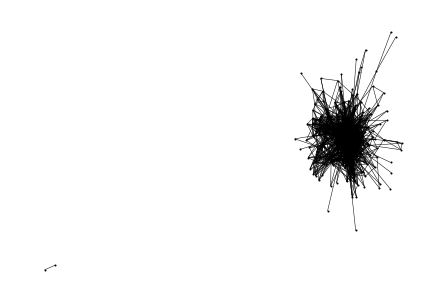

In [19]:
options = {
    'node_color': 'black',
    'node_size': 1,
    'width': 0.5,
}
nx.draw(G, **options)

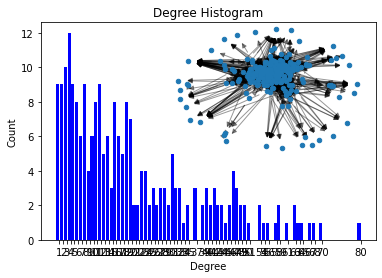

In [34]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

#G = nx.gnp_random_graph(100, 0.02)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()